<div align="center">
    <h1> MTMW14: Numerical Modelling of Atmosphere and Oceans</h1>
<h2> Project 2: A simplified model of ocean gyres</h2>
</div>


## Introduction

In this project we attempt to recreat the results obtained by Stommel (1948), by implementing a dynamical models of ocean circulation, in a homogeneous rectangular system, driven by wind-stress, linear bottom drag, pressure gradient forces generated due to differences in surface height and coriolis force. We will use an analytical solution proposed by Mushgrave (1985), a forward-backward scheme as given by Matsuno (1966) and Beckers and Deleersnijder (1993) and a 4th order Runge-Kutta scheme. The
 model is described by the shallow water equations, linearised about a resting state, given by:
 
\begin{equation}
   \frac{\partial \eta}{\partial t} + H \nabla \cdot \vec{V} = 0
\end{equation}
\begin{equation}
\frac{\partial \vec{V}}{\partial t} + (f_0 + \beta y) \hat{k} \times \vec{V} = -g \nabla \eta - \gamma \vec{V} + \frac{\vec{\tau}}{\rho H}
\end{equation}

, where the prognostic variables are the surface elevation, $\eta(x,t)$ and the depth-averaged horizontal velocity $\vec{V}(x,t)$. Equations (1) and (2) describe the horizontal flow of an incompressible fluid with a free surface and solid lower boundary. The vertical pressure gradient is assumed to be in hydrostatic balance. We also assume that the coriolis parameter varies linearly with latitude as $f=f_0 + \beta y$, i.e., we take the beta plane approximation. 

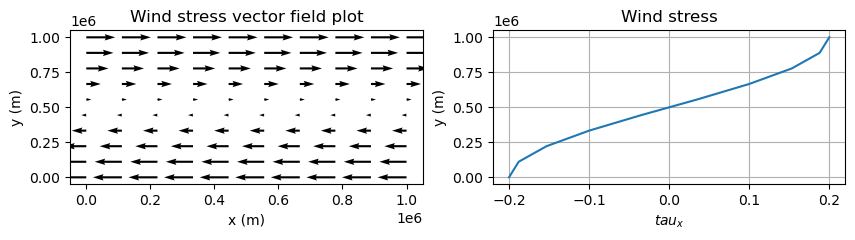

In [1]:
from report_funcs import *
windstress()

The horizontal wind stress term is $\tau$, and is calculated using:

\begin{equation}
    \vec{\tau} =
    \begin{pmatrix}
    \tau_x \\
    \tau_y \\
    \end{pmatrix}
    = \tau_0
    \begin{pmatrix}
    - \cos\left(\frac{\pi y}{L}\right) \\
    0 \\
    \end{pmatrix}
\end{equation}

,where $\tau_0=0.2 N m^{-2}$. As seen in the figure above, the wind stress varies sinosuidally in the meridional direction, but is constant in the zonal direction. This results in anti-cyclonic circulation in the northern hemisphere, as shown by Stommel (1948).

## Task A and B

1. Though the model can support both Rossby waves and gravity waves, the forcings provided in this experiment only generate gravity waves. For rossby waves to be generate, we need a potential vorticity gradient in the initial conditions, or something like a mountain on the sea bed that can generate it later. Even if initial conditions or forcings are provided for the generation of Rossby waves, gravity waves remian more relevant for the calculation of the CFL Criterion since they are much faster. Since all initial flow and height perturbations are 0, any waves generated are due to later forcings.

2. The Rossby radius of deformation is calculated as-
\begin{align}
R_d = \frac{\sqrt{gH}}{f_0}
\end{align}

    , where $g=9.81 m/s^2$ is acceleration due to gravity, $H=1000m$ is ocean depth and $f_0=10^{-4}s^{-1}$ is reference coriolis parameter on a $\beta$-plane. Thus we get $R_D=10^6m$.

3. From Fig.5 in Stommel (1948), we can see the close streamlines near the western boundary. In order to be able to correctly resolve these features, which are less than 10km apart, we have chosen $d=20km$.Thus, $R_D/d = 50$, which puts our problem in the _fine grid_ regime. Anf since we have established that gravity waves are the most prominent, Arakawa-C grid is the best choice for this model.

4. The sketch below shows the staggered Arakawa-C grid with $u$, $v$ and $\eta$ at marked with indices (sorry it is so big. I can't make it smaller without making the writing illegible).
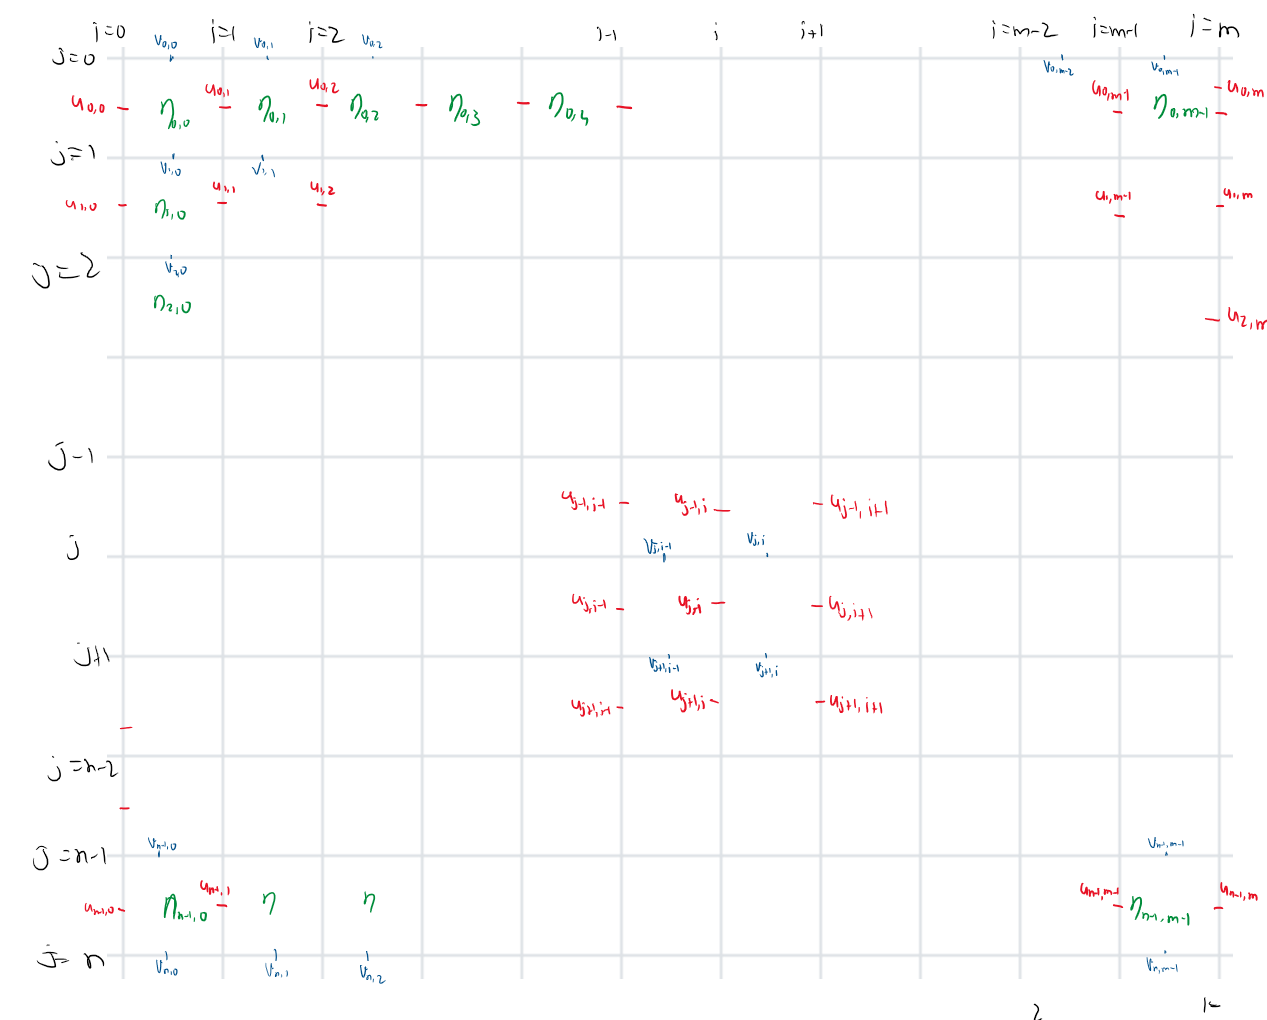


Here, $0\le j \le n$ is the _y-coordinate_ and $0\le i \le m$ is the _x-coordinate_, with $(0,0)$ at the north-west vertex. Initialy all fow is 0, and velocities are always zero when they are normal to a boundary.

For 2D flow, the CFL criterion is (Chapter 6, class notes)-
\begin{align}
\Delta t \leq \frac{d}{\sqrt{2}V_s}
\end{align}

5. The limiting flow for our system is intertial gravity waves, thus the maximum wave speed is the maximum phace speed of gravity waves, given by $V_s=\sqrt{gH}$ (section 6.2.2 in notes). This gives us $V_s \approx 100 m/s$. Thus the CFL criterion is $\Delta t \le 141.42$ seconds. In our calculations, we have taken $dt$ as 0.8 times the maximum value determined by CFL criterion. 

## Task C: Analytical Solution
We use analytical solution derived by Mushgrace (1985) for Equations (1) and (2), for a steady state. The below figure shows countour plots of the zonal velocity $u$, meridional velocity, $v$ and height perturbation $\eta$ at steady state, as derived by this method.

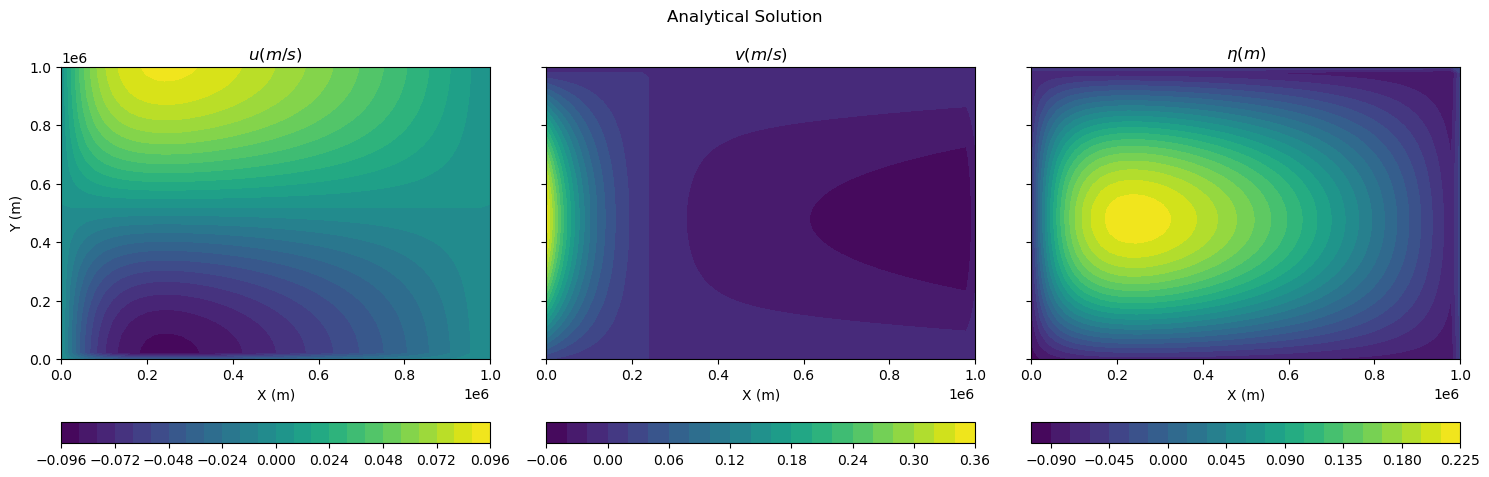

In [2]:
u_st,v_st,eta_st,energyAn=TaskC(20,'Analytical Solution',1)

The unknown constant of integration $\eta_0$, is assumed to be 0 in the initial run. In an exact solution, $\eta_{st}(0, L/2)=\eta_0$, thus the final value of $\eta_{st}(0, L/2)$ at steady state obtained from a numerial model is a good estimate of $\eta_0$. 

We obtain a western boundary current formation at steady state, which is consistent with the findings of Stommel (1948) and Mushgrave (1985). The surface velocities show an anti-cyclonic ocean circulation. This creates a convergence towards the centre of the gyre caused due to Ekman Transport, which creates the bump at the centre of the gyre. In reality, this convergence whould result in downwelling at the centre, but this model fails to represent that.

We can now use this analytical solution as a benchmark to compare the results from any numerical scheme that we implement. For every comparison, we calculate a new analytical solution with $\eta_0$ calculated from the respective numerical solution.

## Task D: Forward-Backward Scheme
We now implement the forward-backward scheme proposed by Matsuno (1966)and Beckers and Deleersnijder (1993), first for just 1 day, and then till steady state is reached. In this  scheme, we alternated between calulating $u$ and $v$ first for each time-step. The time derivatives are discritised using a forward in time scheme. Spatial derivatives are staggered as given for the Arakawa-C grid- $\partial u/\partial x$ and $\partial v/\partial y$ are forward in space on the $\eta$ grid, and $\partial\eta/\partial x$ and $\partial\eta/\partial y$ are backward in space on the $u$ and $v$ grids respectively.

### D.1: Sanity Check
First we run the model for 1 day only to make sure that it is stable, and correctly generates the expected anti-clockwise gyre with a positive height perturbation at its centre.

Time to run model=  0.11369705200195312  seconds


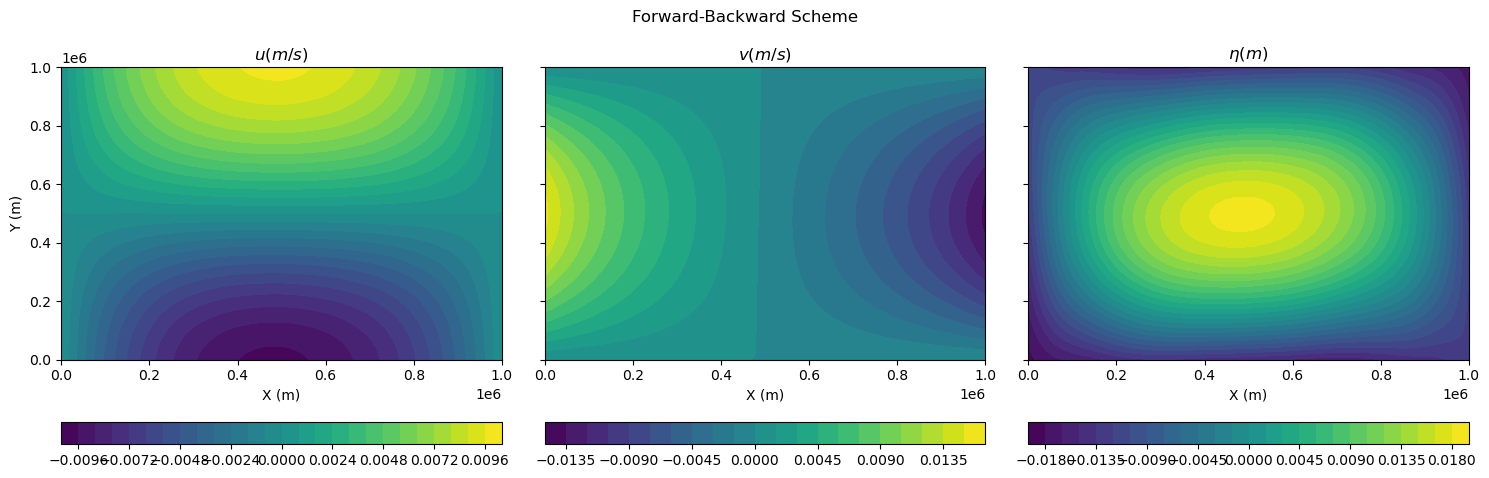

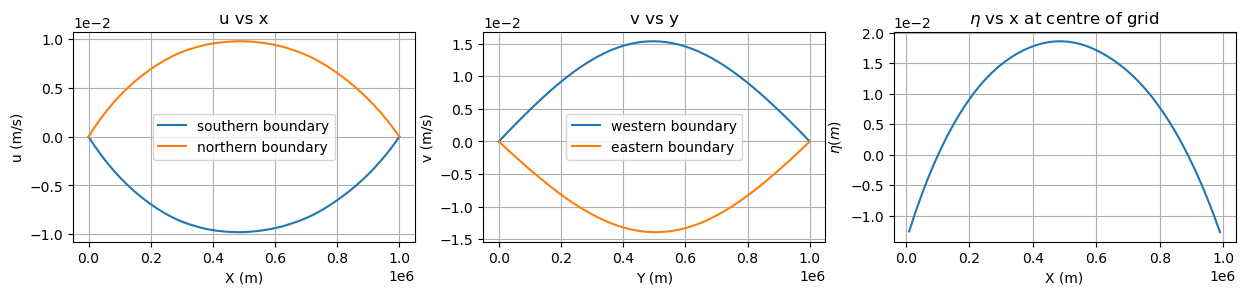

In [3]:
u_u,v_v,eta,dx,dt,nt,energyTS=TaskD12(20,1)

**<center>Sanity Check for FB scheme at 1 day</center>**

We can see from the above plots that the numerical scheme is stable and produces an anti-cyclonic gyre in the ocean as expected. Ekman transport phenomenon causes the ocean surface current direction to be right-ward of the wind stress. Thus, we can see from the above plots that $u$ is mostly negative (westward) near the southern edge and $v$ is mostly positive (northward) near the western boundary.At any given latitude in the domain, $d\eta/dx$ is highest at $x=L/2$ and minimum at the eastern and western biundaries. Thus te minima of $u$ at the southern edge (and maxima at the northern edge) occurs at $x=L/2$. Similary. $v$ maxima at the western boundary is seen at $y=L/2$ becasue $d\eta/dy$ is maximum at $y=L/2$.

We now know that this implementation of the forward-backward scheme can be used to integrate equations (1) and (2) with reasonable accuracy. 

### D.2  Steady State
We now run the FB scheme till steady state (time taken to reach steady state is calculated in Task E).

Time to run model=  4.290602207183838  seconds


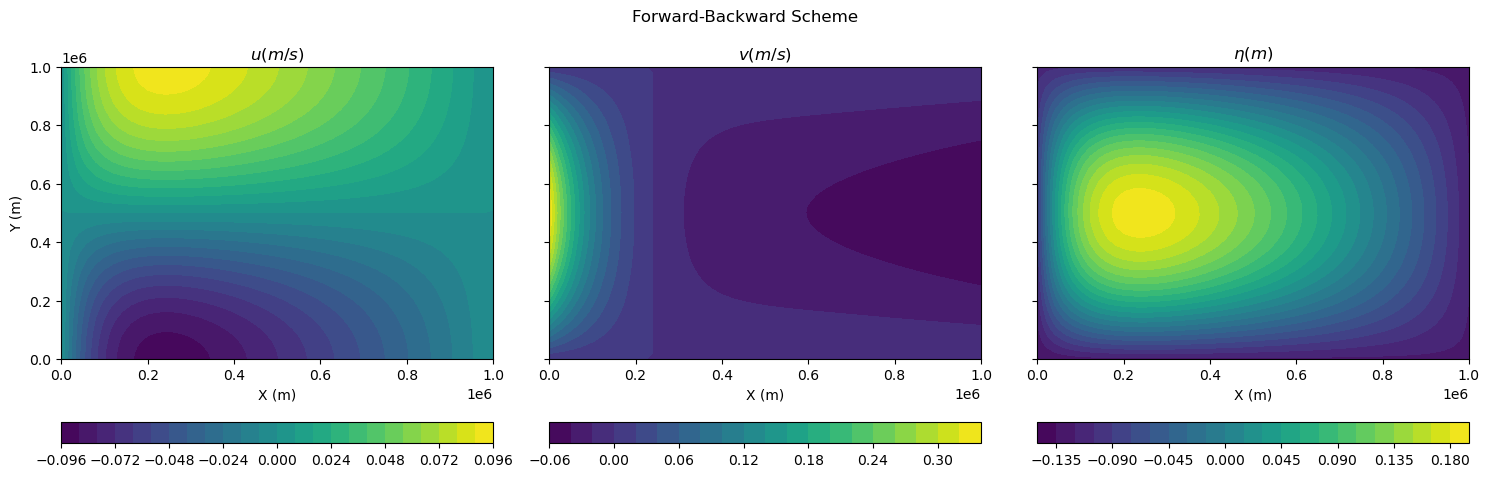

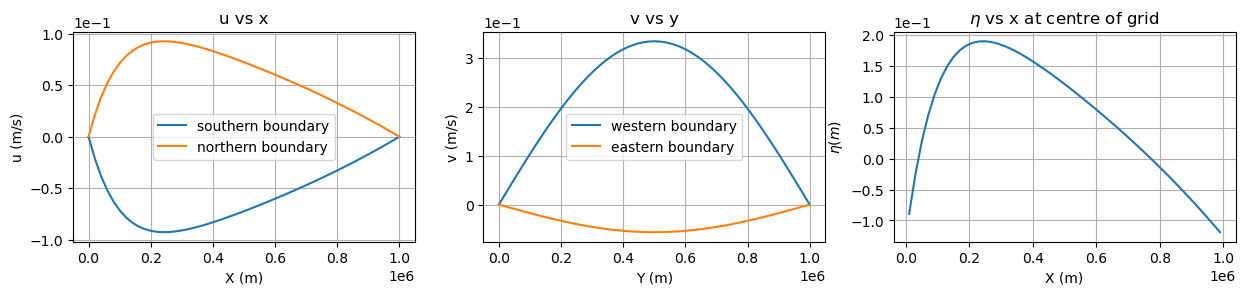

In [4]:
u_u,v_v,eta,dx,dt,nt,energyTS=TaskD12(20,40)

**<center> FB scheme at 40 days</center>**

In the above plots we can see the western boundary current in the form of high poleward velocity in the $v$ countour plot and bump in $\eta$ plot at the centre of the gyre. The flow is still anti-cyclonic, as expected. As the position of the centre of the gyre, i.e. the point of maximum divergence of $\eta$ has moved westward, the longitude of the maxima of $u$ has also moved to coinside with it. It is important to note that the magnitude of $u$ at the northern and southern boundaries is the same, but magnitude of $v$ at the western boundary is much higher than the eastern boundary. This is because it is closer to the centre of the gyre, i.e. has a higher value of $d\eta/dy$.

### D.3: Differences between steady state and analytical model
Here we calculate the differences between the velocity and height perturbation fields at the steady states achieved by the forward-backward nuemrical scheme and the exact analytical solution. We do this by making contour plots of the difference fields, calculated as-
\begin{equation}
    u' = u - u_{st} \\
    v' = v - v_{st} \\
    \eta' = \eta - \eta_{st}
\end{equation}

We then also calculate the energy difference ($\Delta E$) between the results of the 2 schemes by using $u'$, $v'$ and $\eta'$ as inputs in Equation (7). Though this is not the actual difference between the total energies, it is a good measure of the accuracy of a model. The smaller this energy difference value is, the more accurate our model is.

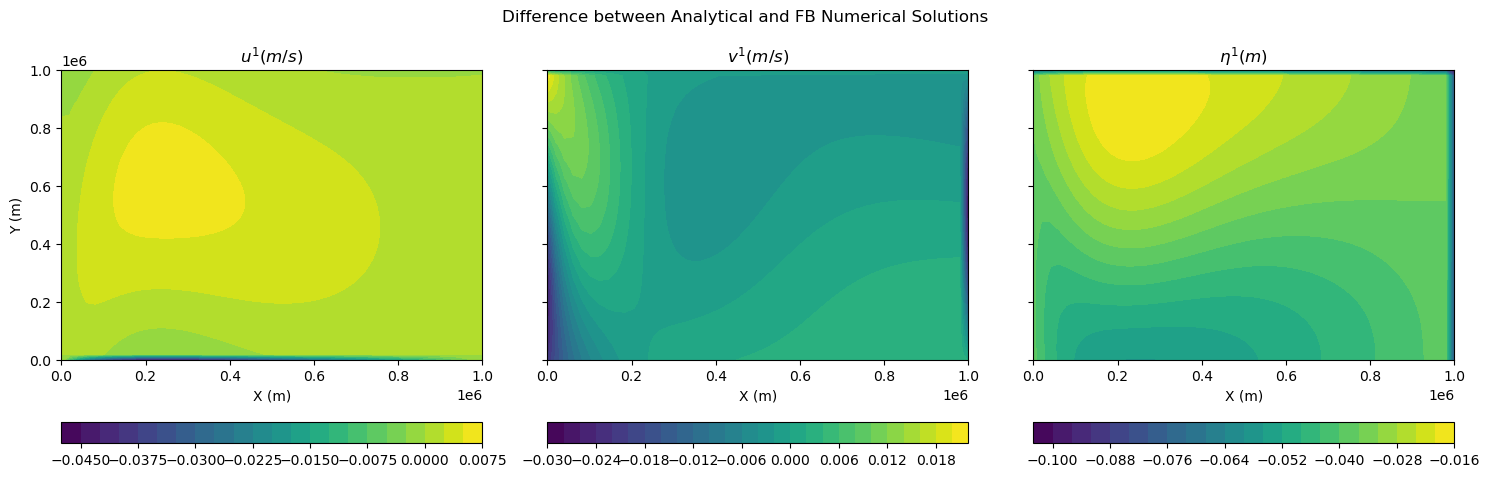

At steady state, the total energy difference between Analytical and numerical methods is  3.626197e+13  Joules


In [5]:
TaskD3(u_u,v_v,eta,u_st,v_st,eta_st,dx,'Difference between Analytical and FB Numerical Solutions')

The energy difference calculated here is $\approx 1.5$% (see Task E), which shows us that our implementation of the FB scheme is within reasonable accuracy.

In the contour plots, there are sudden differences of high magnitude near the edges of the basin. This can be attributed to the fact that boundary conditions in the numerical an anlyticl solutions are implemented differently, and for calculating the differences, the $u_{st}$, $v_{st}$ and $\eta_{st}$ are interpolated to their respective positions on the Arakawa-C grid.

Apart from these extremes, the differences at $<10$% of the analytical values. $\eta$ is everywhere less than $\eta_{st}$, with greatest difference closs to the southern edge and smallest closest to the northern edge. In contrast, the maximum differences in $u$ and $v$ values occurs in the north-west of the basin, with the maxima for $v'$ being right along the western and northern edges. Maximum spatial variation in difference plots occurs in $\eta '$ and minum in $u'$

## Task E: Energy

Now we try to get a better understanding of how well our implementation of the FB schemes works by looking at how long it takes to reach steady state and how its accuracy changes with spatial resolution. The enrgy is calulated using as-
\begin{equation}
    E(u, v, \eta) = \int\limits_{0}^{L}\int\limits_{0}^{L} \left(\frac{1}{2}\rho\left(H(u^2 + v^2) + g\eta^2\right)\right) \, dx \, dy
\end{equation}

, where $\rho$ is the density of water (taken as $ 1000 kg/m^2$), $H$ is the depth of the ocean, and $g$ is the acceleration due to gravity. 

Steady state is reached in  38.746218518518525 days


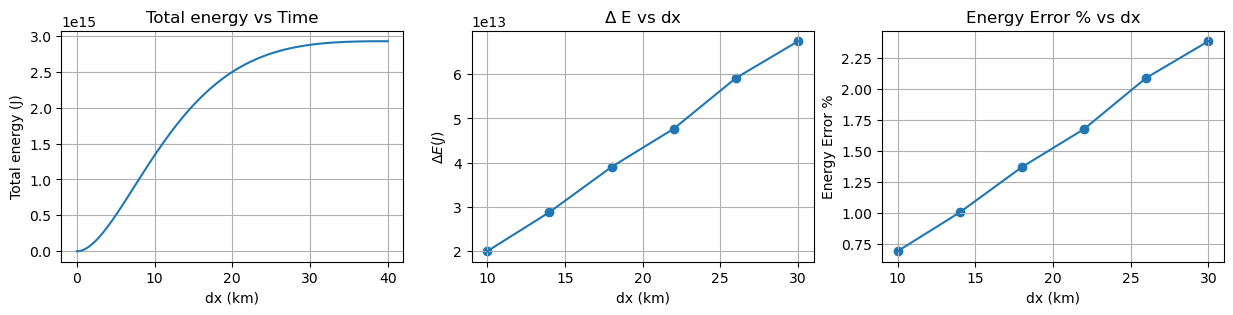

In [6]:
TaskE(u_u,v_v,eta,nt,dx,dt,energyTS)

To calculate the time taken to reach steady state, we calculate the difference in $E$ between every consecutive time step, and define steady state at the time step where this diffenrce reaches $1J$. Thus steady state is reached in $\approx 38.75$ days, but in all clculation in this project, we take it as 40 days for better accuracy and easy inputs. 

As expected, $\Delta E$ value increases with increasing $dx$ value. Note that when we increase $dx$, we also increase the value of $dt$ according to the CFL criterion. But havling $dx$ from $20 km $ to $10 km$ decreaces the energy differnce percentage from $\approx 1.5$% to  $\approx 0.6$%, which is a significant improvement in performance.

## Task G4: 4th-Order Runge Kutta
We now implement the 4th-order Runge-Kutta scheme suing the equations given in the notes and assess its performance by using difference plots with the analytical solution, similar to Task D.3.

Time to run model=  37.8311550617218  seconds


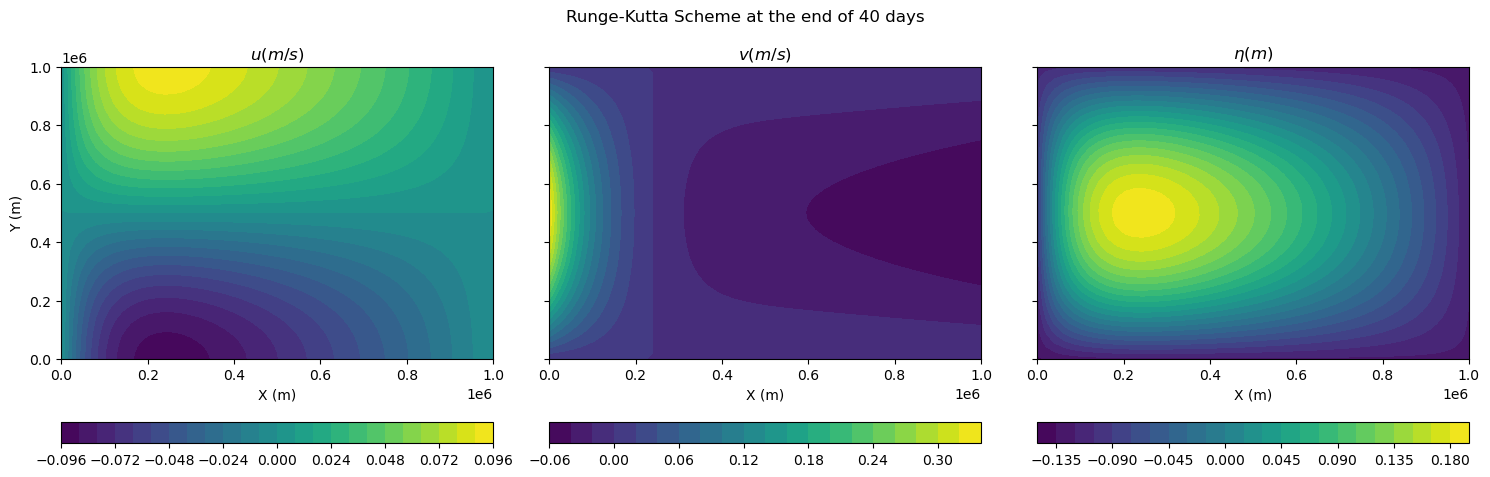

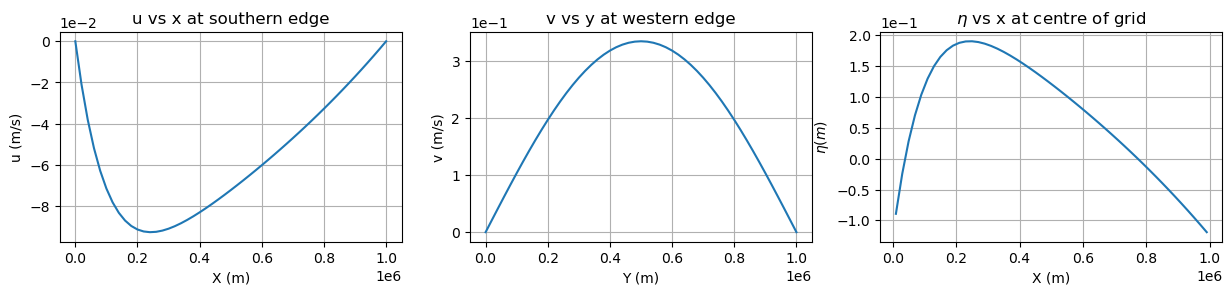

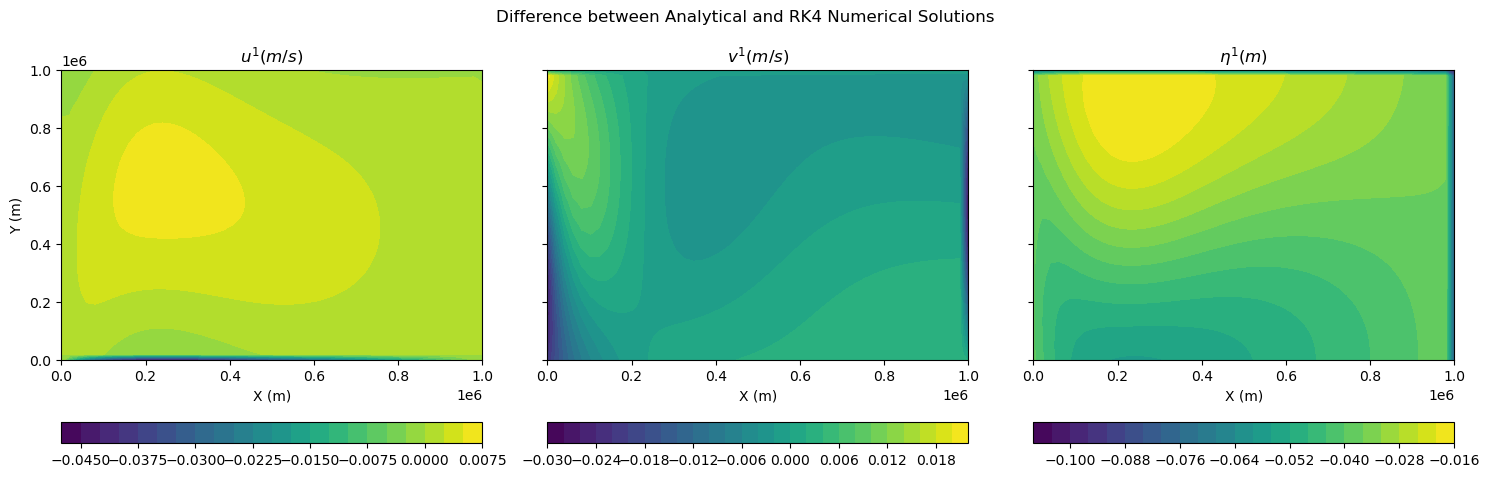

In [7]:
TaskG4(u_st,v_st,eta_st,20,40)

We can see from the contour plots that the results are stable, correctly produce te western boundary current and positive height perturbation at the centre of the gyre. The peaks of $u$ and $v$ along the edges are also consistent with what we obtained for the FB scheme in Task D. The 3 difference contour plots are also similar to those for FB scheme- with highest deviations along edges, and higher deviation in $\eta$ in the south and for $u$ and $v$ in the north-west. The values and distribution of $u'$, $v'$ and $\eta'$ are also similar to those obtained for FB scheme. But the time taken to run the RK4 model is $39.62s$ compared to just $3.8s$ needed for the FB scheme. This means that RK4 requires almost 10 times the time required by FB to run, making it highly inefficient in this scenario. In RK4, at every time step, we calculate 4 intermediate values for $u$, $v$ and $\eta$ before getting a final value, which dramatically increases the execution time.

## Conclusions
Under the given wind forcings, the mathematical model produces a western boundary current with an anti-cyclonic gyre, as confirmed by the analytical solution calculated using equations provided by Mushgrace (1985). The forward-backward scheme proposed by Matsuno (1966)and Beckers and Deleersnijder (1993) is implemented and takes $\approx 39$days to reach steady state. With the exception of boundaries, it calculates the zonal velocity, meridional velocity and sea surface height perturbation values within $10$% of the exact solution and the energy difference is less than $1.5$%. The accuracy of the model improves almost linearly as we make the spatial resolution finer.

The 4th order Runge-Kutta scheme produces similar results to the FB scheme, but takes almost 10 times as much time, making it highly inefficinet in this scenarion.


## References
Beckers, J. and Deleersnijder, E. (1993). Stability of a FBTCS scheme applied to the
 propagation of shallow-water inertia-gravity waves on various grids. J. Computational
 Phys., 108, 95–104.
 
  Matsuno, T. (1966). Numerical simulation of the primitive equations by a simulated
 backward difference method. J. Meteorol. Soc. Japan, 44, 76–84.
 
 Mushgrave, D. (1985). A numerical study of the roles of subgyre-scale mixing and the
 western boundary current on homogenisation of a passive tracer. J. Geophys. Res., 90,
 7037–7043.
 
 Stommel, H. (1948). The westward intensification of wind-driven ocean currents. Trans.
 Am. Geophys. Union, 29, 202–206.